## Housing Prices and Park Proximity

#### Introduction

This project will examine the relationship between housing prices and parks.  Real estate professionals are always looking for factors that influence prices.  It is a cliche that the most important thing in real estate is location, location, location.  I hope to examine how the location of a house relative to popular parks may impact pricing.  This project would help real estate agents, real estate appraisers, single family rental investors, and prospective buyers and sellers in understanding the value of a particular house. In addition, the project could help city planners with park placement and management.

Parks, particularly popular ones, are attractive features for a neighborhood.  They provide space for a variety of outdoor activities including excercise, picnics, and enjoying nature.  While parks are not typically a feature that prospective house buyers look for, they provide real benefits when they are nearby and well maintained.  I hope to examine the impact that popular parks have on housing prices in King County, Washington.  My hypothesis is that popular parks would increase the value of houses in close proximity.

#### Data

In a previous class we examined the housing data for King County, Washington and how various features of the house itself impacted prices.  The housing data from that project included the latitude and longitude of the houses as well as the prices.  Foursquare provides information on a variety of venues including parks.  I will retrieve the location of the popular parks in King County, Washington from Foursquare.  

Using the latitude and longitude of both the parks and houses in the two data sets we can calculate the distance each house is from a particular park.  We will use the popularity of a park on Foursquare as a measure of those that are attractive to potential buyers.  With distance from popular parks and house price data we should be able to determine if proximity has an impact on housing prices.

###### Housing Price Data:

In [58]:
import pandas as pd

file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df_stlhouse=pd.read_csv(file_name)
df_stlhouse.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [59]:
df_stlhouse['id'].count()

21613

###### King County Park Data:

In [60]:
from geopy.geocoders import Nominatim

latlist = list()
lonlist = list()

zcode = df_stlhouse['zipcode'].unique()
for z in zcode:
    address = z
    geolocator = Nominatim(user_agent="stl_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    latlist.append(latitude)
    lonlist.append(longitude)
df_ll=pd.DataFrame(list(zip(latlist,lonlist)),columns=['Latitude','Longitude'])
df_ll['Zipcode'] = zcode
df_ll.head()

,Latitude,Longitude,Zipcode
0,47.498639,-122.247645,98178
1,47.721468,-122.305411,98125
2,47.756876,-122.241875,98028
3,38.099476,15.495463,98136
4,47.614466,-122.035507,98074


In [61]:
# create a map of King County Zipcodes
import folium

address = 'King County, WA'
geolocator = Nominatim(user_agent="stl_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_stl = folium.Map(location=[latitude, longitude], zoom_start=9)

for lat, lng, zcode in zip(df_ll['Latitude'], df_ll['Longitude'], df_ll['Zipcode']):
    label = zcode
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stl)  
    
map_stl

In [140]:
# @hidden_cell
CLIENT_ID = 'PYRV4LPYOCPHX2OUBUPCOSNKD4DLATNPETUIGRDWGK3TQG23' 
CLIENT_SECRET = 'SAND13LEWXVZ5CNZLJWXXKX3XXKHCBQ5TO0F1BIFXIUYEXK4' 
VERSION = '20180605' 

In [141]:
# create request to get parks in and near King County, WA and save as json file
import requests
import json
from pandas.io.json import json_normalize

query = 'park'
            
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&query={}&limit={}&sortByPopularity{}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    40000,
    query,
    50,
    1)
            
results = requests.get(url).json()['response']['groups'][0]['items']

df_parks = json_normalize(results)
df_parks.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.venuePage.id,venue.location.neighborhood
0,e-0-4c3e2833ca012d7fce172fbe-0,0,"[{'summary': 'This spot is popular', 'type': '...",4c3e2833ca012d7fce172fbe,Snoqualmie Point Park,37198 Winery Rd,47.510243,-121.841994,"[{'label': 'display', 'lat': 47.51024308065131...",2968,...,Snoqualmie Valley,WA,United States,"[37198 Winery Rd, Snoqualmie Valley, WA 98045,...","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN,NaN,NaN
1,e-0-4b773e3ef964a520188b2ee3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4b773e3ef964a520188b2ee3,Tiger Mountain Summit,11900 Issaquah Hobart Rd SE,47.444143,-121.961476,"[{'label': 'display', 'lat': 47.44414339220613...",8883,...,Issaquah,WA,United States,[11900 Issaquah Hobart Rd SE (SE 113th Street)...,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],SE 113th Street,NaN,NaN
2,e-0-540b8cf8498ee75cf32d4fdd-2,0,"[{'summary': 'This spot is popular', 'type': '...",540b8cf8498ee75cf32d4fdd,Jeanne Hansen Park,34226 SE Jacobia Street,47.518542,-121.881771,"[{'label': 'display', 'lat': 47.5185420875111,...",3772,...,Snoqualmie,WA,United States,"[34226 SE Jacobia Street, Snoqualmie, WA 98065...","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN,NaN,NaN
3,e-0-463fd072f964a52051461fe3-3,0,"[{'summary': 'This spot is popular', 'type': '...",463fd072f964a52051461fe3,Gene Coulon Park,1201 Lake Washington Blvd N,47.506602,-122.201966,"[{'label': 'display', 'lat': 47.50660166897992...",25642,...,Renton,WA,United States,"[1201 Lake Washington Blvd N, Renton, WA 98056...","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN,NaN,NaN
4,e-0-439158cdf964a520572b1fe3-4,0,"[{'summary': 'This spot is popular', 'type': '...",439158cdf964a520572b1fe3,Marymoor Park,6046 W Lake Sammamish Pkwy NE,47.662653,-122.118050,"[{'label': 'display', 'lat': 47.66265318016147...",27386,...,Redmond,WA,United States,"[6046 W Lake Sammamish Pkwy NE, Redmond, WA 98...","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN,NaN,NaN


In [142]:
df_parks = df_parks[['venue.name','venue.location.address','venue.location.city','venue.location.lat','venue.location.lng']]
df_parks.head()

,venue.name,venue.location.address,venue.location.city,venue.location.lat,venue.location.lng
0,Snoqualmie Point Park,37198 Winery Rd,Snoqualmie Valley,47.510243,-121.841994
1,Tiger Mountain Summit,11900 Issaquah Hobart Rd SE,Issaquah,47.444143,-121.961476
2,Jeanne Hansen Park,34226 SE Jacobia Street,Snoqualmie,47.518542,-121.881771
3,Gene Coulon Park,1201 Lake Washington Blvd N,Renton,47.506602,-122.201966
4,Marymoor Park,6046 W Lake Sammamish Pkwy NE,Redmond,47.662653,-122.118050


In [143]:
df_parks.rename(columns={'venue.name':'Park_Name','venue.location.address':'Address','venue.location.city':'City','venue.location.lat':'Latitude','venue.location.lng':'Longitude'},inplace=True)
df_parks.head()

,Park_Name,Address,City,Latitude,Longitude
0,Snoqualmie Point Park,37198 Winery Rd,Snoqualmie Valley,47.510243,-121.841994
1,Tiger Mountain Summit,11900 Issaquah Hobart Rd SE,Issaquah,47.444143,-121.961476
2,Jeanne Hansen Park,34226 SE Jacobia Street,Snoqualmie,47.518542,-121.881771
3,Gene Coulon Park,1201 Lake Washington Blvd N,Renton,47.506602,-122.201966
4,Marymoor Park,6046 W Lake Sammamish Pkwy NE,Redmond,47.662653,-122.118050


In [144]:
df_parks['Park_Name'].count()

50

In [175]:
# create a map of King County Parks
import folium

address = 'King County, WA'
geolocator = Nominatim(user_agent="stl_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_stlparks = folium.Map(location=[latitude, longitude], zoom_start=9)

for lat, lng, park in zip(df_parks['Latitude'], df_parks['Longitude'], df_parks['Park_Name']):
    label = park
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stlparks)  
    
map_stlparks

Now we can find the median and average for house prices and square feet to refine the data set.

In [84]:
df_stlhouse.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Location and house size will have a significant impact on housing prices.  To control for those we will pick zip codes with average prices near the median above ($450,000) and similar in size to the median sq ft above (1,910).

In [73]:
df_stlhouse['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Now we can look at the average house price for each zip code to find those between 400,000 and 500,000.

In [85]:
df_stlhp = df_stlhouse[['price','zipcode']].groupby(['zipcode']).mean()
df_stlhp.sort_values(by='price', ascending=False, axis=0, inplace=True)
df_stlhp.head()

,price
zipcode,
98039,2.160607e+06
98004,1.355927e+06
98040,1.194230e+06
98112,1.095499e+06
98102,9.012583e+05


In [97]:
df_stlzca = df_stlhp[df_stlhp['price']>400000]
df_stlzc = df_stlzca[df_stlzca['price']<500000]
df_stlzc

,price
zipcode,
98059,493552.532051
98011,490351.466667
98070,487479.627119
98125,469455.770732
98166,464231.838583
98028,462480.035336
98014,455617.112903
98045,439471.081448
98019,424788.747368


In [102]:
zcodes = df_stlzc.index.tolist()
zcodes

[98059,
 98011,
 98070,
 98125,
 98166,
 98028,
 98014,
 98045,
 98019,
 98126,
 98155,
 98010,
 98056,
 98118]

Then we can further refine the data set to houses between 1,800 and 2,100 sq ft.

In [124]:
df_stlax = df_stlhouse[df_stlhouse['zipcode'].isin(zcodes)]
df_stlax['sqft_living'] = pd.to_numeric(df_stlax['sqft_living'], errors='coerce')
df_stlax.dropna(subset=['sqft_living'], axis=0, inplace = True)  
df_stlax = df_stlax[df_stlax['sqft_living']>1800]
df_stla = df_stlax[df_stlax['sqft_living']<2100]
df_stla

C:\Users\mease\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mease\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16,16,1875500060,20140731T000000,395000.0,3.0,2.00,1890,14040,2.0,0,...,7,1890,0,1994,0,98019,47.7277,-121.962,1890,14018
59,59,8079040320,20150223T000000,430000.0,4.0,3.00,1850,9976,2.0,0,...,8,1850,0,1991,0,98059,47.5059,-122.149,2270,8542
82,82,9418400240,20141028T000000,355000.0,2.0,1.00,2020,6720,1.0,0,...,7,1010,1010,1948,0,98118,47.5474,-122.291,1720,6720
290,290,6113400046,20140723T000000,389999.0,4.0,2.50,1890,15770,2.0,0,...,7,1890,0,1968,0,98166,47.4281,-122.343,2410,15256
294,294,9297300045,20140709T000000,550000.0,3.0,2.00,1970,4166,2.0,0,...,8,1270,700,1929,0,98126,47.5717,-122.375,2390,4166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21404,21404,2325400040,20140922T000000,353000.0,3.0,2.25,1900,3800,2.0,0,...,7,1900,0,2006,0,98059,47.4866,-122.160,1950,3800
21439,21439,1703400910,20140811T000000,639000.0,3.0,2.50,2010,3300,2.0,0,...,9,1610,400,2014,0,98118,47.5573,-122.287,1660,4950
21448,21448,255550100,20140711T000000,326000.0,3.0,2.25,1930,3462,2.0,0,...,7,1930,0,2004,0,98019,47.7453,-121.985,1930,2952
21545,21545,6669080120,20141215T000000,405000.0,4.0,2.50,1980,5020,2.0,0,...,7,1980,0,2007,0,98056,47.5147,-122.190,1980,5064


There are 516 houses in the zip codes with a median home price of $ 400,000 to $ 500,000 that also have 1800 - 2100 sq ft.

Next we can use geopy.distance.distance(coords_1, coords_2) to find the minimum distance from each house to one of the popular parks.

In [145]:
#getting the distance from each house to the selected parks
import geopy.distance

parkdist = list()
for hcx, hcy, hid in zip(df_stla['lat'], df_stla['long'], df_stla['id']):
    mindist = 100
    for pcx, pcy, pn in zip(df_parks['Latitude'], df_parks['Longitude'], df_parks['Park_Name']):
        coords_1 = (hcx, hcy)
        coords_2 = (pcx, pcy)
        x = geopy.distance.distance(coords_1, coords_2).km
        if x < mindist:
            mindist = x
    parkdist.append(mindist)
parkdist

[9.644783667769975,
 3.9909570902656153,
 2.5534716392333414,
 10.645485966692021,
 4.887014310830054,
 12.139541802671493,
 8.551909879569475,
 2.48604861402422,
 8.503631476985976,
 17.12503913081937,
 5.44934733930018,
 3.3266087651560357,
 3.658280515642942,
 9.719752862189923,
 2.635861939851002,
 5.685285276054704,
 5.806836856709988,
 3.2369775525694173,
 3.079306848473254,
 2.0664491909639318,
 1.208331278235023,
 0.8569992380864497,
 8.622992565350897,
 4.139298480654829,
 1.821340589219985,
 8.248926059915409,
 4.423939183206296,
 1.9685115089669651,
 7.509475711798352,
 4.337375836644643,
 4.350792448228478,
 4.000111250424571,
 5.048920959891181,
 3.892990946248186,
 2.487305457198513,
 5.219444030098689,
 3.7801863359382404,
 8.796279168066707,
 2.9616378947493174,
 7.787823553482827,
 3.5841777471178196,
 4.63722615499189,
 2.4573523769146415,
 8.167596243953486,
 5.52150581366922,
 2.1225691638238566,
 8.154457224813736,
 7.164021561622961,
 2.791372676312061,
 8.6829204

We can add the park distance column to our data set and then drop the columns that are not needed.

In [146]:
df_stla['Park_Dist'] = parkdist
df_stla.head()

C:\Users\mease\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Park_Dist
16,16,1875500060,20140731T000000,395000.0,3.0,2.0,1890,14040,2.0,0,...,1890,0,1994,0,98019,47.7277,-121.962,1890,14018,9.644784
59,59,8079040320,20150223T000000,430000.0,4.0,3.0,1850,9976,2.0,0,...,1850,0,1991,0,98059,47.5059,-122.149,2270,8542,3.990957
82,82,9418400240,20141028T000000,355000.0,2.0,1.0,2020,6720,1.0,0,...,1010,1010,1948,0,98118,47.5474,-122.291,1720,6720,2.553472
290,290,6113400046,20140723T000000,389999.0,4.0,2.5,1890,15770,2.0,0,...,1890,0,1968,0,98166,47.4281,-122.343,2410,15256,10.645486
294,294,9297300045,20140709T000000,550000.0,3.0,2.0,1970,4166,2.0,0,...,1270,700,1929,0,98126,47.5717,-122.375,2390,4166,4.887014


In [147]:
df_stlpd = df_stla[['id','price','sqft_living','zipcode','lat','long','Park_Dist']]
df_stlpd.reset_index(drop=True,inplace=True)
df_stlpd.head()

,id,price,sqft_living,zipcode,lat,long,Park_Dist
0,1875500060,395000.0,1890,98019,47.7277,-121.962,9.644784
1,8079040320,430000.0,1850,98059,47.5059,-122.149,3.990957
2,9418400240,355000.0,2020,98118,47.5474,-122.291,2.553472
3,6113400046,389999.0,1890,98166,47.4281,-122.343,10.645486
4,9297300045,550000.0,1970,98126,47.5717,-122.375,4.887014


In [176]:
df_stlpd.describe()

,id,price,sqft_living,zipcode,lat,long,Park_Dist
count,5.160000e+02,5.160000e+02,516.000000,516.000000,516.000000,516.000000,516.000000
mean,4.306871e+09,4.293850e+05,1942.344961,98086.974806,47.601253,-122.222275,5.241103
std,2.670592e+09,1.079580e+05,85.757375,52.718168,0.131054,0.154656,3.554674
min,1.200019e+06,1.800000e+05,1802.000000,98010.000000,47.310200,-122.515000,0.534662
25%,2.201704e+09,3.600000e+05,1860.000000,98045.000000,47.491250,-122.313500,2.819616
50%,3.823150e+09,4.150000e+05,1940.000000,98070.000000,47.553100,-122.269500,4.215026
75%,6.372875e+09,4.700000e+05,2020.000000,98126.000000,47.738150,-122.167000,7.190029
max,9.578061e+09,1.190000e+06,2090.000000,98166.000000,47.777200,-121.698000,24.695966


A scatterplot is good first view of the dataset.

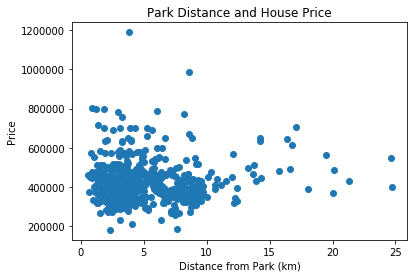

In [154]:
import matplotlib.pyplot as plt
plt.scatter(df_stlpd['Park_Dist'], df_stlpd['price']) 
plt.xlabel('Distance from Park (km)')
plt.ylabel('Price')
plt.title('Park Distance and House Price')
plt.show()

The correlation between the key variables is also helpful.

In [173]:
df_stlpd[['Park_Dist','price']].corr()

,Park_Dist,price
Park_Dist,1.000000,0.014167
price,0.014167,1.000000


Now we can run the regression analysis.

In [161]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df_stlpd[['Park_Dist']]
Y = df_stlpd['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([431279.73648937, 428847.13208505, 428228.64239644, 431710.29671021,
       429232.66791841])

In [163]:
lm.intercept_

427129.99066548405

In [164]:
lm.coef_

array([430.25805107])

We can create a new scatterplot that includes the regression line.

(0, 1240818.5895702138)

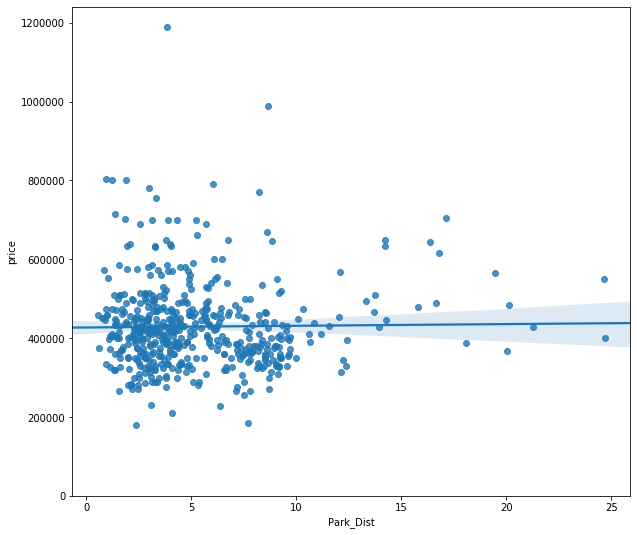

In [177]:
import seaborn as sns
%matplotlib inline 
width = 10
height = 9
plt.figure(figsize=(width, height))
sns.regplot(x='Park_Dist', y='price', data=df_stlpd)
plt.ylim(0,)

In [166]:
rsq = lm.score(X,Y)
print("R squared:", rsq)

R squared: 0.00020070040981179368


In [172]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, Yhat)
print('mean squared error:', mse)

mean squared error: 11630000687.384447


We can do a second regression analysis using training and testing splits on the data set.

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
y_data = df_stlpd['price']
x_data = df_stlpd.drop('price', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)
lre=LinearRegression()
lre.fit(x_train[['Park_Dist']], y_train)
testr2 = lre.score(x_test[['Park_Dist']], y_test)
trainr2 = lre.score(x_train[['Park_Dist']], y_train)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
print("Test Rsq:", testr2)
print("Train Rsq:", trainr2)

number of test samples : 155
number of training samples: 361
Test Rsq: -0.008305838895816375
Train Rsq: 0.0014874621868116167


In [168]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, x_data[['Park_Dist']], y_data, cv=4)
Rcross

array([-0.00555555, -0.01165469, -0.00459241, -0.0053079 ])

In [169]:
print("The mean of the folds:", Rcross.mean())
print("standard deviation:" , Rcross.std())

The mean of the folds: -0.006777640739225155
standard deviation: 0.0028378894271917283


In [153]:
-1 * cross_val_score(lre,x_data[['Park_Dist']], y_data,cv=4,scoring='neg_mean_squared_error')

array([1.15015015e+10, 1.28483632e+10, 1.05238182e+10, 1.18497549e+10])